# Construction of the networks + Degree Distribution Analysis

## <span style="color:red">Get the Y2H human network and the proteins</span>

The annotated Y2H network is annotated with uniprot Id (need to convert it back to Entrez).

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import networkx as nx
import pandas as pd

# HISTOGRAM
degrees_hist = {}

y2h_network = pd.read_csv("../data/networks/y2h_hc_full.tsv", delim_whitespace = True, header = None)
y2h_occurences = list(y2h_network[0]) + list(y2h_network[1])
y2h_nodes = set(y2h_network[0]).union(set(y2h_network[1]))
y2h_network, len(y2h_nodes)

(                          0                 1         2
 0      uniprotkb:A0A024R644  uniprotkb:P37268  0.814719
 1      uniprotkb:A0A024R644  uniprotkb:Q8IVJ1  0.821118
 2      uniprotkb:A0A024R644  uniprotkb:Q8IY26  0.802731
 3      uniprotkb:A0A024R644  uniprotkb:Q8TDT2  0.811284
 4      uniprotkb:A0A024R644  uniprotkb:Q96JW4  0.848161
 ...                     ...               ...       ...
 35542      uniprotkb:Q9UL46  uniprotkb:Q9UL46  0.805359
 35543      uniprotkb:Q9UMS4  uniprotkb:O60508  0.630000
 35544      uniprotkb:Q9Y328  uniprotkb:O14718  0.728123
 35545      uniprotkb:Q9Y3E7  uniprotkb:Q9UQN3  0.590000
 35546      uniprotkb:Q9Y5Q3  uniprotkb:Q9Y5Q3  0.710000
 
 [35547 rows x 3 columns],
 7364)

In [99]:
_, deg       = zip(*(collections.Counter(y2h_occurences)).items()) 
deg_count    = collections.Counter(deg)
degrees_hist = [("Y2H-complete", k, deg_count[k]) for k in range(1000)]

## <span style="color:red">Get the Y2H-shared human network and the proteins</span>

The annotated Y2H-shared network is also annotated with uniprot Id.

In [100]:
y2h_shared_network = pd.read_csv("../data/networks/y2h_hc_shared.tsv", delim_whitespace = True, header = None)
y2h_shared_occurences = list(y2h_shared_network[0]) + list(y2h_shared_network[1])
y2h_nodes = set(y2h_shared_network[0]).union(set(y2h_shared_network[1]))
_, deg       = zip(*(collections.Counter(y2h_shared_occurences)).items()) 
deg_count    = collections.Counter(deg)
degrees_hist += [("Y2H-shared", k, deg_count[k]) for k in range(1000)]

## <span style="color:red">Get the COIP human network and the proteins</span>

The annotated COIP network is also annotated with uniprot Id.

In [101]:
coip_network = pd.read_csv("../data/networks/coip_hc_full.tsv", sep = "\t", header = None)
coip_prots   = set(coip_network[0]).union(set(coip_network[1]))
coip_occurences = list(coip_network[0]) + list(coip_network[1])

_, deg       = zip(*(collections.Counter(coip_occurences)).items()) 
deg_count    = collections.Counter(deg)
degrees_hist+= [("COIP-complete", k, deg_count[k]) for k in range(1000)]
coip_network, len(coip_prots)

(                          0                 1     2
 0      uniprotkb:A0A0B4J1S8  uniprotkb:Q9H3P7  0.57
 1          uniprotkb:Q9H3P7  uniprotkb:O43493  0.55
 2          uniprotkb:Q9H3P7  uniprotkb:Q8WUA7  0.64
 3          uniprotkb:Q9H3P7  uniprotkb:Q08378  0.40
 4          uniprotkb:Q9H3P7  uniprotkb:Q9UBF8  0.54
 ...                     ...               ...   ...
 29228      uniprotkb:Q9Y3C0  uniprotkb:Q9Y2V7  0.67
 29229      uniprotkb:Q9Y3D3  uniprotkb:Q9Y4X4  0.42
 29230      uniprotkb:Q9Y4X4  uniprotkb:Q8NCR0  0.42
 29231      uniprotkb:Q9Y6I4  uniprotkb:Q8N5D0  0.40
 29232      uniprotkb:Q9Y6X8  uniprotkb:Q9Y6X8  0.51
 
 [29233 rows x 3 columns],
 8433)

## <span style="color:red">Get the COIP-shared human network and the proteins</span>

The annotated COIP-shared network is also annotated with uniprot Id.

In [102]:
coip_shared_network = pd.read_csv("../data/networks/coip_hc_shared.tsv", delim_whitespace = True, header = None)
coip_shared_occurences = list(coip_shared_network[0]) + list(coip_shared_network[1])
coip_nodes = set(coip_shared_network[0]).union(set(coip_shared_network[1]))
_, deg       = zip(*(collections.Counter(coip_shared_occurences)).items()) 
deg_count    = collections.Counter(deg)
degrees_hist += [("COIP-shared", k, deg_count[k]) for k in range(1000)]

## Compute Degree Distribution

In [103]:
import numpy as np

deg_df = pd.DataFrame(degrees_hist, columns = ["Network", "deg", "frequency"])
deg_df1 = deg_df.loc[1:].reset_index(drop = True)
print(deg_df1)
deg_df1["ldeg"] = np.log(deg_df1["deg"])
deg_df1["lfreq"] = np.log(deg_df1["frequency"] + 1e-50)
deg_df1

           Network  deg  frequency
0     Y2H-complete    1       2108
1     Y2H-complete    2       1113
2     Y2H-complete    3        668
3     Y2H-complete    4        492
4     Y2H-complete    5        360
...            ...  ...        ...
3994   COIP-shared  995          0
3995   COIP-shared  996          0
3996   COIP-shared  997          0
3997   COIP-shared  998          0
3998   COIP-shared  999          0

[3999 rows x 3 columns]


/scratch2/kdevko01/conda/.conda/envs/dscript/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Network,deg,frequency,ldeg,lfreq
0,Y2H-complete,1,2108,0.000000,7.653495
1,Y2H-complete,2,1113,0.693147,7.014814
2,Y2H-complete,3,668,1.098612,6.504288
3,Y2H-complete,4,492,1.386294,6.198479
4,Y2H-complete,5,360,1.609438,5.886104
...,...,...,...,...,...
3994,COIP-shared,995,0,6.902743,-115.129255
3995,COIP-shared,996,0,6.903747,-115.129255
3996,COIP-shared,997,0,6.904751,-115.129255
3997,COIP-shared,998,0,6.905753,-115.129255


/scratch2/kdevko01/conda/.conda/envs/dscript/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in power
  
/scratch2/kdevko01/conda/.conda/envs/dscript/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in power
  
/scratch2/kdevko01/conda/.conda/envs/dscript/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in power
  
/scratch2/kdevko01/conda/.conda/envs/dscript/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in power
  


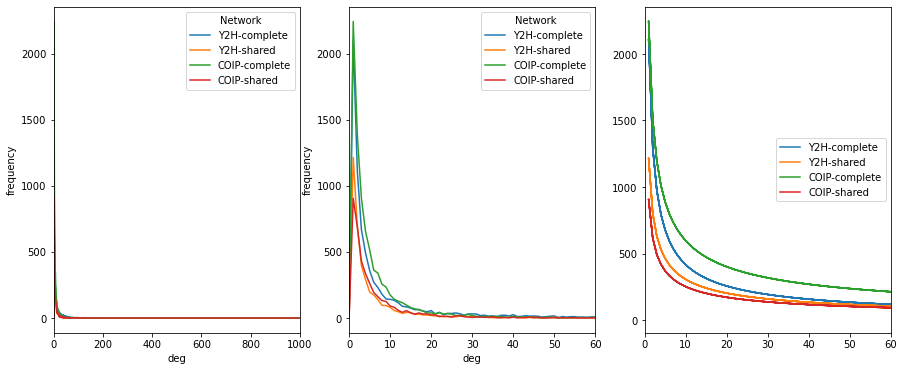

In [97]:
fig, [ax0, ax1, ax2] = plt.subplots(ncols=3, figsize = (15, 6))
sns.lineplot(data = deg_df, x = "deg", y = "frequency", hue="Network", ax=ax0)
ax0.set_xlim(0, 1000)
sns.lineplot(data = deg_df, x = "deg", y = "frequency", hue="Network", ax=ax1)
ax1.set_xlim(0, 60)
x = deg_df["deg"].values.astype(np.float32)
for k, v in dfmap.items():
    ax2.plot(x, np.power(x, v[1]) * v[0], label = k)
ax2.set_xlim(0, 60)
ax2.legend()

<AxesSubplot:xlabel='ldeg', ylabel='lfreq'>

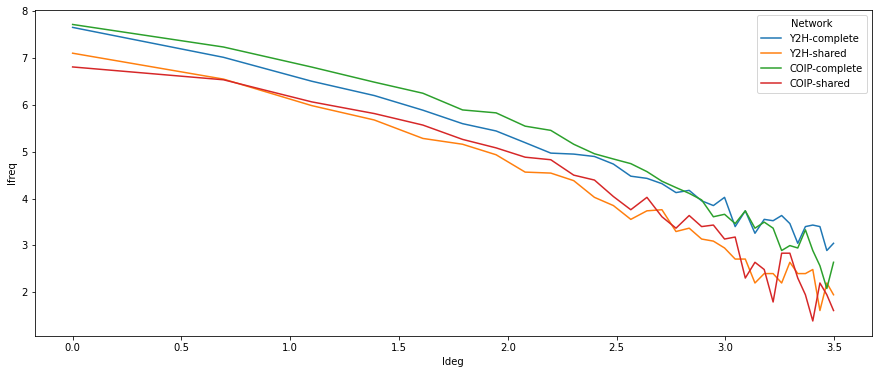

In [104]:
fig, ax0 = plt.subplots(ncols=1, figsize = (15, 6))
sns.lineplot(data = deg_df1.loc[deg_df1["ldeg"] <= 3.5, :], x = "ldeg", y = "lfreq", hue = "Network", ax=ax0)
# ax0.set_xlim(0, 1000)
# sns.lineplot(data = deg_df, x = "deg", y = "frequency", hue="Network", ax=ax1)
# ax1.set_xlim(0, 60)


In [92]:
deg_df1.loc[deg_df1["ldeg"] <= 3.5, "ldeg"].values.reshape(-1, 1).astype(np.float32)

array([[0.       ],
       [0.6931472],
       [1.0986123],
       [1.3862944],
       [1.609438 ],
       [1.7917595],
       [1.9459101],
       [2.0794415],
       [2.1972246],
       [2.3025851],
       [2.3978953],
       [2.4849067],
       [2.5649493],
       [2.6390574],
       [2.7080503],
       [2.7725887],
       [2.8332133],
       [2.8903718],
       [2.944439 ],
       [2.9957323],
       [3.0445225],
       [3.0910425],
       [3.1354942],
       [3.1780539],
       [3.218876 ],
       [3.2580965],
       [3.295837 ],
       [3.3322046],
       [3.3672957],
       [3.4011974],
       [3.4339871],
       [3.465736 ],
       [3.4965076],
       [     -inf],
       [0.       ],
       [0.6931472],
       [1.0986123],
       [1.3862944],
       [1.609438 ],
       [1.7917595],
       [1.9459101],
       [2.0794415],
       [2.1972246],
       [2.3025851],
       [2.3978953],
       [2.4849067],
       [2.5649493],
       [2.6390574],
       [2.7080503],
       [2.7725887],


In [108]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
deg_df2 = deg_df1[deg_df1["Network"] == "COIP-complete"]
x = deg_df2.loc[(deg_df2["ldeg"] <= 3) & (deg_df2["ldeg"] > -1000), "lfreq"].values.reshape(-1, 1).astype(np.float32)
y = deg_df2.loc[(deg_df2["ldeg"] <= 3) & (deg_df2["ldeg"] > -1000), "ldeg"].values.astype(np.float32)
reg.fit(x, y)
reg.coef_
# COIP complete = -0.57433, array([-0.66970056], dtype=float32)
# COIP shared   = -0.55502, array([-0.7079694], dtype=float32)
# Y2H shared    = -0.597229, array([-0.66811293], dtype=float32)
# Y2H complete  = -0.703060, array([-0.75400966], dtype=float32)

array([-0.66970056], dtype=float32)

In [86]:
dfcoef = deg_df1.loc[deg_df1["deg"] == 1, ["Network", "frequency"]].values
dfmap  = {k: [v] for k, v in dfcoef}
dfmap["COIP-complete"] += [-0.57433]
dfmap["COIP-shared"]   += [-0.55502]
dfmap["Y2H-complete"]  += [-0.70306]
dfmap["Y2H-shared"]    += [-0.59722]
dfmap

{'Y2H-complete': [2108, -0.70306],
 'Y2H-shared': [1215, -0.59722],
 'COIP-complete': [2244, -0.57433],
 'COIP-shared': [906, -0.55502]}

In [10]:
# TODO analyse the distribution of the hub nodes
fig.savefig("diagrams/degree_distribution.svg")

# Analysis of the Link Prediction Scores 

### Construct CV blocks

In [12]:
import json
import numpy as np
import networkx as nx
import pandas as pd

def compute_training_edges(G, training_perc = 0.75, test_neg_ratio = 20, k=5, output_folder=""):
    """
        Function that takes in a network "G" and computes `k` CV blocks. Each block contains training_edges, 
        test_edges and test_labels. 
        -- The ratio of edges labeled negative in the test_labels compared to positive is given by `test_neg_ratio`
        -- The ratio of positive edges in `G` classified as training over the total number of edges is given by 
        `training_perc` 
    """
    # Use only the Largest connected component of G 
    largest_cc = max(nx.connected_components(G), key = len)
    G          = G.subgraph(largest_cc)
    
    o_suffix       = f"training_perc_{training_perc}_test_neg_ratio_{test_neg_ratio}"
    
    training_edges = []
    test_edges     = []
    test_labels    = []
    mst            = nx.algorithms.tree.maximum_spanning_edges(G, 
                                                               algorithm="kruskal",
                                                              data = True)
    mst            = list(mst)
    R              = G.copy()
    R.remove_edges_from(mst)
    remaining      = R.edges(data = True)
    
    nodemap        = {i: k for i, k in enumerate(list(G.nodes()))}
    
    mst            = [(p, q, w[2]) for p, q, w in mst]
    remaining      = [(p, q, w[2]) for p, q, w in remaining]
    
    rem_n          = len(remaining)
    mst_n          = len(mst)
    
    remaining_r    = int(training_perc * (rem_n + mst_n) - mst_n)
    neg_count      = int(test_neg_ratio * (rem_n - remaining_r))
    print(f"Generating {k} Folds...")
    for i in range(k):
        # Output location
        output_tr = output_folder + f"/k_{i}_training_{o_suffix}.txt"
        output_te = output_folder + f"/k_{i}_testing_{o_suffix}.txt"
        
        print(f"\t{i}-th Fold...")
        ids = np.random.permutation(len(remaining))
        training_edge = mst + [remaining[j] for j in ids[:remaining_r]]
        
        # Saving Training Df
        training_df = pd.DataFrame(training_edge)
        training_df.to_csv(output_tr, sep = "\t", header = None, index = None)
        
        test_edge  = [(remaining[j][0], remaining[j][1])  for j in ids[remaining_r:]]
        test_label = [1 for j in range(len(test_edge))]
                      
        tesposmap = {(p, q) for (p, q) in test_edge}
        n_testneg = 0
        neg_ids   = np.random.randint(len(nodemap), size=(neg_count+1000, 2))
        for j in range(neg_count + 1000):
            p_, q_ = neg_ids[j]
            if p_ == q_: 
                continue
            p      = nodemap[p_]
            q      = nodemap[q_]
            if (p, q) in tesposmap or (q, p) in tesposmap:
                continue
            n_testneg += 1
            test_edge.append((p, q))
            test_label.append(0)
            
            if n_testneg == neg_count:
                break
                
        # Save Testing
        testing_df = pd.DataFrame(test_edge)
        testing_df[2] = test_label
        testing_df.to_csv(output_te, sep = "\t", header = None, index = None)
    return

def get_training_edges(net_folder, training_perc = 0.75, test_neg_ratio = 20, k=5):
    """
        Function that gets the precomputed embeddings
        (training_edges, test_edges, labels, udsed, dsed, nodemap)
    """
    train_pack = []
    for k in range(5):
        tr_prefix, te_prefix = [f"{net_folder}/k_{k}_{tt}_training_perc_{training_perc}_test_neg_ratio_{test_neg_ratio}"
                                for tt in ["training", "testing"]]
        test_df  = pd.read_csv(f"{te_prefix}.txt", sep = "\t", header = None)
        train_df = pd.read_csv(f"{tr_prefix}.txt", sep = "\t", header = None)
        with open(f"{tr_prefix}.json", "r") as jf:
            nodemap = json.load(jf)
        udsed    = np.load(f"{tr_prefix}_U.npy")
        dsed     = np.load(f"{tr_prefix}_N.npy")
        train    = train_df.values
        test     = test_df[[0,1]].values
        label    = test_df[[2]].T.values
        train_pack.append((train, test, label[0], udsed, dsed, nodemap))
    return train_pack

### Different Link Prediction Algorithms

In [13]:
def construct_neighbors_dict(training_graph):
    neighbors_dict = {}
    for p, q, _ in training_graph:
        for m, n in [(p, q), (q, p)]:
            neighbors_dict[m] = ([n] if m not in neighbors_dict 
                                 else neighbors_dict[m] + [n])
    return neighbors_dict

def construct_edge_dict(training_graph):
    edges = {}
    for p, q, w in training_graph:
        edges[(p, q)] = w
        edges[(q, p)] = w
    return edges

def predict_edges_cw(training_edges, test_pairs, X, nodemap, return_normalized_scores = False,
                     normalize = True, neighbors_dict = None, edge_dict = None):
    if neighbors_dict == None:
        neighbors_dict = construct_neighbors_dict(training_edges)
    if edge_dict == None:
        edge_dict = construct_edge_dict(training_edges)
    
    scores = []
    for p, q in test_pairs:
        cw_score         = 0
        common_neighbors = set(neighbors_dict[p]).intersection(neighbors_dict[q])
        for n in common_neighbors:
            cw_score += edge_dict[p, n] + edge_dict[q, n]
        cw_score /= np.sqrt(len(neighbors_dict[p]) * len(neighbors_dict[q]))
        scores.append(cw_score)
    scores = np.array(scores) 
    return scores / np.max(scores)


def predict_edges_l3(training_edges, test_pairs, X, nodemap, return_normalized_scores = False, 
                     normalize = True, neighbors_dict = None, edge_dict = None):
    def construct_adj(edges):
        """
        Constructs two adjacency matrices: A and (A / (sqrt(d)) / sqrt(d).T
        """
        if len(edges[0]) == 2:
            node1, node2 = zip(*edges)
        else:
            node1, node2, _ = zip(*edges)
        nodeset = set(node1).union(set(node2))
        nodemap = {node: i for i, node in enumerate(nodeset)}
        n       = len(nodemap)
        A       = np.zeros((n, n))
        for ed in zip(node1, node2):
            p, q = list(map(lambda x: nodemap[x], ed))
            A[p, q] = 1
            A[q, p] = 1
        d_sq = np.sqrt(A @ np.ones((n, 1)))
        M    = (A / d_sq) / d_sq.T
        return A, M, nodemap
    A, M, nodemap = construct_adj(training_edges)
    scores        = np.zeros((len(test_pairs),))
    l3_scores     = A @ M @ A
    for i, (p_, q_) in enumerate(test_pairs):
        p, q = list(map(lambda x: nodemap[x], [p_, q_]))
        scores[i] = l3_scores[p, q]
    if normalize:
        return scores / np.max(scores)
    else:
        return scores

def predict_edges_glidel3(training_edges, test_pairs, X, nodemap, return_normalized_scores = False,
                         normalize = True, neighbors_dict = None, edge_dict = None):
    l3_scores = predict_edges_l3(training_edges, test_pairs, X, nodemap, normalize = False)
    dsd_scores = predict_edges_dsd(training_edges, test_pairs, X, nodemap, 
                                   return_normalized_score = False)
    alpha, beta, delta = 0.1, 1000, 0.01
    scores    = np.zeros((len(test_pairs), ))
    for i in range(len(test_pairs)):
        scores[i] = np.exp(alpha / (1 + beta / dsd_scores[i])) * l3_scores[i] + delta * dsd_scores[i]
    return scores / np.max(scores)


def predict_edges_glidecw(training_edges, test_pairs, X, nodemap, return_normalized_score = False,
                         normalize = True, neighbors_dict = None, edge_dict = None):
    cw_scores = predict_edges_cw(training_edges, test_pairs, X, nodemap)
    dsd_scores = predict_edges_dsd(training_edges, test_pairs, X, nodemap,
                                   return_normalized_score = False)
    alpha, beta, delta = 0.1, 1000, 0.01
    scores    = np.zeros((len(test_pairs), ))
    for i in range(len(test_pairs)):
        scores[i] = np.exp(alpha / (1 + beta / dsd_scores[i])) * cw_scores[i] + delta * dsd_scores[i]
    return scores / np.max(scores)


def predict_edges_dsd(training_edges, test_pairs, X, nodemap, return_normalized_score = True,
                     normalize = True, neighbors_dict = None, edge_dict = None):
    # Compute distance
    scores     = []
    for p_, q_ in test_pairs:
        p = nodemap[p_]
        q = nodemap[q_]
        dist = np.linalg.norm(X[p] - X[q])
        scores.append(1 / (dist + 0.00001))
    scores     = np.array(scores)
    if return_normalized_score:
        return scores / np.max(scores)
    else:
        return scores

### Construct train-test blocks

In [14]:
networks = ["y2h_hc_full", "y2h_hc_shared", 
           "coip_hc_full", "coip_hc_shared"]
train_packs = {}
print("Processing networks:")
for net in networks:
    print(f"\tProcessing network {net}...")
    train_packs[net] = get_training_edges(f"../data/networks/{net}/")

Processing networks:
	Processing network y2h_hc_full...
	Processing network y2h_hc_shared...
	Processing network coip_hc_full...
	Processing network coip_hc_shared...


### Use this to construct the training instances and new CV blocks

In [29]:
# from os import mkdir, path
# training_entries = {}
# netids = ["y2h_hc_full", "coip_hc_full", "y2h_hc_shared", "coip_hc_shared"]
# netpd  = [pd.read_csv(f"../data/networks/{file}.tsv", sep = "\t", header = None) for file in netids]
# nets   = [nx.from_pandas_edgelist(npd, 0, 1, 2) for npd in netpd]
# for netid, G in zip(netids, nets):
#     net_dir = f"../data/networks/{netid}" 
#     if not path.exists(net_dir):
#         mkdir(net_dir)
#     print(f"For network {netid}...")
#     compute_training_edges(G, output_folder=net_dir)

In [15]:
from sklearn.metrics import average_precision_score

In [16]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

"""
Initialization
"""
table_results = []
curves        = {}

In [17]:

netids = ["y2h_hc_full", "y2h_hc_shared", 
           "coip_hc_full", "coip_hc_shared"]
for network in netids:
    print(f"Dataset: {network}...")
    train_pack = train_packs[network]
    for k in range(5):
        print(f"\tFold: {k}...")
        train, test, labels, udsed, dsed, nodemap = train_pack[k]
        for method, mname, which_dsd in [(predict_edges_glidel3, "glide_l3_u", 0),
                                    (predict_edges_l3, "l3", None),
                                    (predict_edges_cw, "cw_normalized", None),
                                 (predict_edges_dsd, "dsd_unnormalized", 0),
                                 (predict_edges_dsd, "dsd_normalized", 1),
                                  (predict_edges_glidecw, "glide_cw_u", 0),
                                  (predict_edges_glidel3, "glide_l3_n", 1),
                                  (predict_edges_glidecw, "glide_cw_n", 1),
                                 ]:
            print(f"\t\tMethod: {mname}")
            
            scores = method(train, 
                            test, 
                            udsed if which_dsd == 0 else dsed, 
                            nodemap)
            
            aupr   = average_precision_score(labels, scores)
            roc    = roc_auc_score(labels, scores)
            table_results.append((network, k, mname, "AUPR", aupr))
            table_results.append((network, k, mname, "ROC", roc))
            
            # PRCURVES
            prec, recall, thresholds = precision_recall_curve(labels, scores)
            curves[f"{network}:{mname}:{k}:PREC"]   = prec
            curves[f"{network}:{mname}:{k}:RECALL"] = recall
        

Dataset: y2h_hc_full...
	Fold: 0...
		Method: glide_l3_u
		Method: l3
		Method: cw_normalized
		Method: dsd_unnormalized
		Method: dsd_normalized
		Method: glide_cw_u
		Method: glide_l3_n
		Method: glide_cw_n
	Fold: 1...
		Method: glide_l3_u
		Method: l3
		Method: cw_normalized
		Method: dsd_unnormalized
		Method: dsd_normalized
		Method: glide_cw_u
		Method: glide_l3_n
		Method: glide_cw_n
	Fold: 2...
		Method: glide_l3_u
		Method: l3
		Method: cw_normalized
		Method: dsd_unnormalized
		Method: dsd_normalized
		Method: glide_cw_u
		Method: glide_l3_n
		Method: glide_cw_n
	Fold: 3...
		Method: glide_l3_u
		Method: l3
		Method: cw_normalized
		Method: dsd_unnormalized
		Method: dsd_normalized
		Method: glide_cw_u
		Method: glide_l3_n
		Method: glide_cw_n
	Fold: 4...
		Method: glide_l3_u
		Method: l3
		Method: cw_normalized
		Method: dsd_unnormalized
		Method: dsd_normalized
		Method: glide_cw_u
		Method: glide_l3_n
		Method: glide_cw_n
Dataset: y2h_hc_shared...
	Fold: 0...
		Method: gli

In [18]:
df_table = pd.DataFrame(table_results, columns = ["networks", "k-folds", "methods", "metric", "score"])
df_table.to_csv("../results/link_prediction_different_methods.tsv", sep = "\t", index = None)
#df_mean  = df_table.groupby(["networks", "methods", "metric"], as_index= False).mean()[["networks", "methods", "metric", "score"]]
#df_mean

In [57]:
import pandas as pd
df_table = pd.read_csv("../results/link_prediction_different_methods.tsv", sep = "\t")
df_table

,networks,k-folds,methods,metric,score
0,y2h_hc_full,0,glide_l3_u,AUPR,0.736226
1,y2h_hc_full,0,glide_l3_u,ROC,0.948720
2,y2h_hc_full,0,l3,AUPR,0.718294
3,y2h_hc_full,0,l3,ROC,0.938534
4,y2h_hc_full,0,cw_normalized,AUPR,0.216183
...,...,...,...,...,...
315,coip_hc_shared,4,glide_cw_u,ROC,0.879129
316,coip_hc_shared,4,glide_l3_n,AUPR,0.657412
317,coip_hc_shared,4,glide_l3_n,ROC,0.919036
318,coip_hc_shared,4,glide_cw_n,AUPR,0.484683


In [59]:
df_mean = df_table.drop(["k-folds"], axis = 1).groupby(["networks", "methods", "metric"], as_index = False).mean()
df_mean["net_type"] = df_mean.apply(lambda x: "shared" if x["networks"].endswith("shared") else "full", axis = 1)

methodsmap = {"cw_normalized": 0, "l3": 1, "dsd_unnormalized" : 2,
              "dsd_normalized":3, "glide_cw_u": 4, "glide_cw_n": 5, "glide_l3_u": 6, "glide_l3_n": 7}
netmap = {"coip_hc_full": "Co-IP", "coip_hc_shared": "Co-IP-shared", "y2h_hc_full": "Y2H", "y2h_hc_shared": "Y2H-shared"}
df_mean = df_mean.replace({"methods": methodsmap, "networks": netmap})
df_mean = df_mean[df_mean["methods"] < 2]

        networks  methods     score net_type
0          Co-IP        0  0.375620     full
14         Co-IP        1  0.686141     full
16  Co-IP-shared        0  0.356063   shared
30  Co-IP-shared        1  0.617749   shared
32           Y2H        0  0.217012     full
46           Y2H        1  0.718699     full
48    Y2H-shared        0  0.181172   shared
62    Y2H-shared        1  0.581441   shared


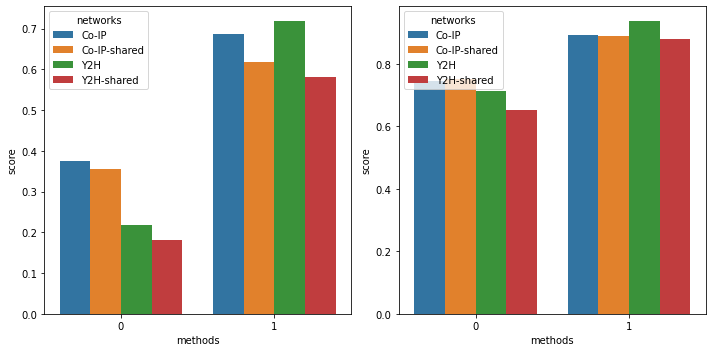

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
f, ax = plt.subplots(1, 2, figsize = (10, 5))

print(df_mean[df_mean["metric"] == "AUPR"].drop("metric", axis = 1))
sns.barplot(
    data = df_mean[df_mean["metric"] == "AUPR"].drop("metric", axis = 1),
    x="methods",
    y="score",
    hue="networks",
    ax = ax[0]
)

sns.barplot(
    data = df_mean[df_mean["metric"] == "ROC"].drop("metric", axis = 1),
    x="methods",
    y="score",
    hue="networks",
    ax = ax[1]
)


#g.set_xticklabels(rotation=90)
f.tight_layout() 
plt.savefig("diagrams/mean_lp_results_only_cwl3.svg")

In [ ]:
# g = sns.relplot(
    data = df_mean,
    x="methods",
    y="score",
    hue="networks",
    col="metric",
    kind = "line",
    sizes = (10, 100),
    palette=""
)
g.set_xticklabels(rotation = 45)

# Spectral Clustering Results For the networks

In [107]:
import networkx as nx
import pandas as pd
import numpy as np

def construct_Adj(filename):
    df = pd.read_csv(filename, sep = "\t", header = None)
    # Preprocessing
    df.loc[df[2] == 0, [2]] = 0.001
    G = nx.from_pandas_edgelist(df, 0, 1, 2)
    
    # Get the largest connected component
    cc = max(nx.connected_components(G), key = len)
    G = G.subgraph(cc)
    
    # Get nodemap
    nodemap = {k:i for i,k in enumerate(list(G.nodes()))}
    
    edges   = [(nodemap[p], nodemap[q], w[2]) for p, q, w in G.edges(data = True)]
    A = np.zeros((len(nodemap), len(nodemap)))
    for p, q, w in edges:
        A[p, q], A[q, p] = w, w
    return A, nodemap
    
networks = ["y2h_hc_full", "y2h_hc_shared",
           "coip_hc_full", "coip_hc_shared"]

net_Adjs = {}
for net in networks:
    print(f"Processing network {net}")
    filename = f"../data/networks/{net}.tsv"
    A, nmap  = construct_Adj(filename)
    net_Adjs[net] = (A, nmap)

Processing network y2h_hc_full
Processing network y2h_hc_shared
Processing network coip_hc_full
Processing network coip_hc_shared


### FuncAssociate, to be used for functional enrichment later

In [108]:
## FuncAssociate
import http.client
import json
import ast
class FuncAssociate():
    host      = "llama.mshri.on.ca"
    query_url = "/cgi/funcassociate/serv"
    def __init__(self):
        self.conn = http.client.HTTPConnection(self.host)
        
    def jsonify(self, payload):
        return (json.dumps(payload)).encode('utf-8')
    
    def generate_payload(self, genelist):
        payload = {"id": "dc8bed03b5a9787447db75d7b948784f",
                  "method": "functionate",
                  "params": [
                      {
                          "query": list(genelist),
                          "species": "Homo sapiens",
                          "namespace": "entrezgene"
                      }
                  ],
                  "jsonrpc": "2.0"}
        return payload
    
    def request(self, list_of_entrezgene):
        payload = self.generate_payload(list_of_entrezgene)
        self.conn.request('POST', self.query_url, self.jsonify(payload), 
                       headers={'Content-type': 'application/json'})
        response = self.conn.getresponse()
        resdict  = json.loads(response.read().decode("UTF-8"))
        columns  = ["No-queries-having-row's-attribute", 
                    "len(queries)",
                    "Total-queries-having-row's-attribute",
                    "logarithm-odds-ratio",
                   "p-value",
                   "adjusted-p-value",
                   "Gene-Ontology-Id",
                   "Gene-Ontology-Attribute"]
        return pd.DataFrame(resdict["result"]["over"], columns = columns)


fassoc = FuncAssociate()

## Recursive Spectral Clustering

In [109]:
from sklearn.cluster import SpectralClustering

def recursive_clustering(A, clusters, lower, higher):
    indices_to_cluster = [list(range(A.shape[0]))]
    labels             = {}
    label_count        = 0
    while(True):
        
        # Break condition
        if len(indices_to_cluster) == 0:
            break
        
        ids   = indices_to_cluster.pop()
        Aid   = A[np.ix_(ids, ids)] 
        idmap = {i:k for i, k in enumerate(ids)}
        c_ss  = SpectralClustering(n_clusters = clusters, affinity="precomputed").fit(Aid)
        
        # labels - id mapping
        gen_labels = {}
        for i, label in enumerate(c_ss.labels_):
            gen_labels[label] = ([idmap[i]] if label not in gen_labels
                                 else gen_labels[label] + [idmap[i]])
        for l in gen_labels:
            if len(gen_labels[l]) < lower:
                pass
            elif len(gen_labels[l]) > higher:
                indices_to_cluster.append(gen_labels[l].copy())
            else:
                labels[label_count] = [k for k in gen_labels[l]]
                label_count        += 1
    return labels

def compute_X_normalized(A, t = -1, lm = 1, is_normalized = True):
    n, _ = A.shape
    d    = A @ np.ones((n, 1))
    P    = A / d
    Identity = np.identity(A.shape[0])
    e = np.ones((A.shape[0], 1))

    D = np.diag(d.flatten())
    # Compute W
    scale = np.matmul(e.T, np.matmul(D, e))[0, 0]
    W = np.multiply(1 / scale, np.matmul(e, np.matmul(e.T, D)))

    up_P = np.multiply(lm, P - W)
    X_ = Identity - up_P
    X_i = np.linalg.pinv(X_)

    if t > 0:
        LP_t = Identity - np.linalg.matrix_power(up_P, t)
        X_i = np.matmul(X_i, LP_t)

    if is_normalized == False:
        return X_i

    # Normalize with steady state
    SS = np.sqrt(np.matmul(D, e))
    SS = 1 / SS
    SS = np.diag(SS.flatten())

    return np.matmul(X_i, SS)

## Entrez map

In [110]:
entr = pd.read_csv("../data/idmap/uprot_entrez_new.tsv", sep = "\t").values
entrmap = {k:i for k, i in entr}

## Y2H full clusters

/afs/csail.mit.edu/u/k/kdevko01/miniconda3/envs/dscript/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."
/afs/csail.mit.edu/u/k/kdevko01/miniconda3/envs/dscript/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."
/afs/csail.mit.edu/u/k/kdevko01/miniconda3/envs/dscript/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."
/afs/csail.mit.edu/u/k/kdevko01/miniconda3/envs/dscript/lib/python3.7/site-packages/sklearn/manifold/_spectral_e

Label: 0
Label: 1
Label: 2
Label: 3
Label: 4
Label: 5
Label: 6
Label: 7
Label: 8
Label: 9
Label: 10
Label: 11
Label: 12
Label: 13
Label: 14
Label: 15
Label: 16
Label: 17
Label: 18
Label: 19
Label: 20
Label: 21
Label: 22
Label: 23
Label: 24
Label: 25
Label: 26


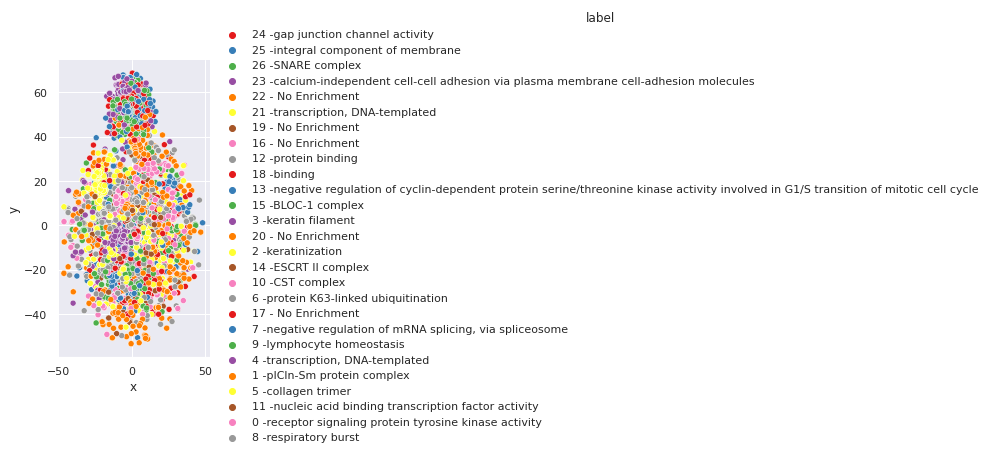

In [112]:
# Cluster
A, nodemap = net_Adjs["y2h_hc_full"]
clusters = recursive_clustering(A, 3, 50, 500)
# TSNE
from sklearn.manifold import TSNE
# Embedding
X = compute_X_normalized(A)
T = TSNE(n_components=2, learning_rate='auto',
                   init='random').fit_transform(X)
# Uniprot->Entrez
ids_to_select = []
for i in clusters:
    ids_to_select += clusters[i]
ids_to_select = sorted(ids_to_select)
ids_to_select

T = T[ids_to_select]

#After sorting, we get a new map that links the new order with the older position
idmap        = {i:k for i, k in enumerate(ids_to_select)}
ridmap       = {k:i for i, k in idmap.items()}
labels       = np.zeros((len(idmap),))

clusters_entrez  = {}
r_map_s      = {k:entrmap[i] for i, k in nodemap.items()}
for i in clusters:
    clusters_entrez[i] = []
    for j in clusters[i]:
        labels[ridmap[j]] = i 
        clusters_entrez[i].append(r_map_s[j])
table = {}
table["x"] = T[:, 0]
table["y"] = T[:, 1]
table["label"] = labels

df = pd.DataFrame(table)

fenrich = {}
for label, prots in clusters_entrez.items():
    print(f"Label: {label}")
    fenrich[label] = fassoc.request(list(prots))
    
phat_thres = 0.0005
f       = {}
for i in fenrich:
    f[i] = fenrich[i].loc[fenrich[i]["adjusted-p-value"] <= phat_thres]

df["label"] = df["label"].apply(lambda x: f"{int(x)} -"  + ( 
    " No Enrichment " if f[int(x)].empty 
    else f[int(x)].loc[f[int(x)]["adjusted-p-value"].idxmin()]["Gene-Ontology-Attribute"]))

sns.set(rc={'figure.figsize':(20, 15)})
sns.relplot(data=df, x="x", y = "y", hue="label", palette="Set1")

## COIP full

/afs/csail.mit.edu/u/k/kdevko01/miniconda3/envs/dscript/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."
/afs/csail.mit.edu/u/k/kdevko01/miniconda3/envs/dscript/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."
/afs/csail.mit.edu/u/k/kdevko01/miniconda3/envs/dscript/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."
/afs/csail.mit.edu/u/k/kdevko01/miniconda3/envs/dscript/lib/python3.7/site-packages/sklearn/manifold/_spectral_e

Label: 0
Label: 1
Label: 2
Label: 3
Label: 4
Label: 5
Label: 6
Label: 7
Label: 8
Label: 9
Label: 10
Label: 11
Label: 12
Label: 13
Label: 14
Label: 15
Label: 16
Label: 17
Label: 18
Label: 19
Label: 20
Label: 21
Label: 22
Label: 23
Label: 24
Label: 25
Label: 26
Label: 27
Label: 28
Label: 29
Label: 30
Label: 31
Label: 32
Label: 33
Label: 34
Label: 35
Label: 36
Label: 37
Label: 38
Label: 39
Label: 40
Label: 41
Label: 42
Label: 43
Label: 44
Label: 45
Label: 46
Label: 47
Label: 48
Label: 49
Label: 50


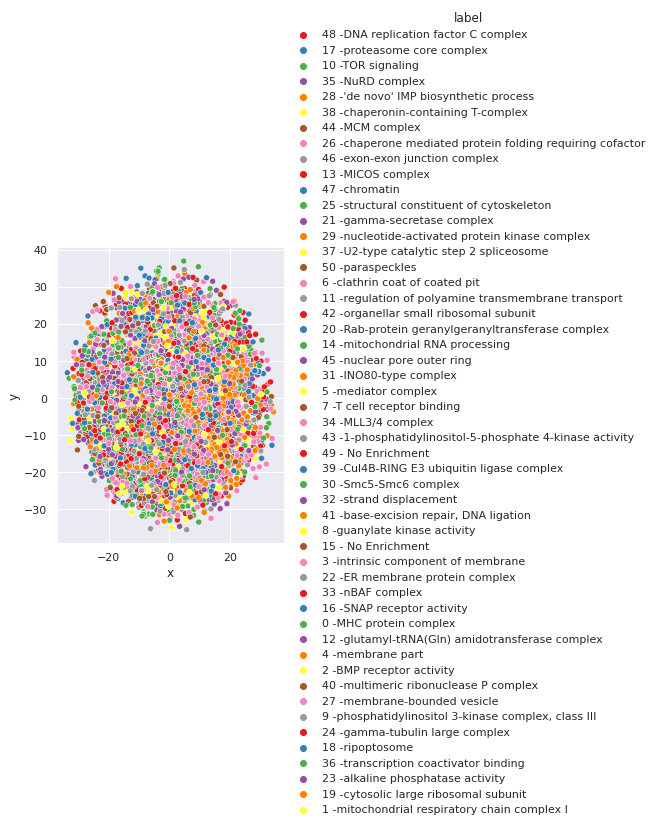

In [76]:
# Cluster
A, nodemap = net_Adjs["coip_full"]
clusters = recursive_clustering(A, 3, 50, 500)

# TSNE
from sklearn.manifold import TSNE
# Embedding
X = compute_X_normalized(A)
T = TSNE(n_components=2, learning_rate='auto',
                   init='random').fit_transform(X)

# Uniprot->Entrez
ids_to_select = []
for i in clusters:
    ids_to_select += clusters[i]
ids_to_select = sorted(ids_to_select)
ids_to_select

T = T[ids_to_select]

#After sorting, we get a new map that links the new order with the older position
idmap        = {i:k for i, k in enumerate(ids_to_select)}
ridmap       = {k:i for i, k in idmap.items()}
labels       = np.zeros((len(idmap),))

clusters_entrez  = {}
r_map_s      = {k:entrmap[i] for i, k in nodemap.items()}
for i in clusters:
    clusters_entrez[i] = []
    for j in clusters[i]:
        labels[ridmap[j]] = i 
        clusters_entrez[i].append(r_map_s[j])
        
table = {}
table["x"] = T[:, 0]
table["y"] = T[:, 1]
table["label"] = labels

df = pd.DataFrame(table)
df

fenrich = {}
for label, prots in clusters_entrez.items():
    print(f"Label: {label}")
    fenrich[label] = fassoc.request(list(prots))
    
phat_thres = 0.0005
f       = {}
for i in fenrich:
    f[i] = fenrich[i].loc[fenrich[i]["adjusted-p-value"] <= phat_thres]
    
df["label"] = df["label"].apply(lambda x: f"{int(x)} -"  + ( 
    " No Enrichment " if f[int(x)].empty 
    else f[int(x)].loc[f[int(x)]["adjusted-p-value"].idxmin()]["Gene-Ontology-Attribute"]))

import seaborn as sns
sns.set(rc={'figure.figsize':(20, 15)})
sns.relplot(data=df, x="x", y = "y", hue="label", palette="Set1")

## Biotin Full

/afs/csail.mit.edu/u/k/kdevko01/miniconda3/envs/dscript/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."
/afs/csail.mit.edu/u/k/kdevko01/miniconda3/envs/dscript/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."
/afs/csail.mit.edu/u/k/kdevko01/miniconda3/envs/dscript/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."
/afs/csail.mit.edu/u/k/kdevko01/miniconda3/envs/dscript/lib/python3.7/site-packages/sklearn/manifold/_spectral_e

Label: 0
Label: 1
Label: 2
Label: 3
Label: 4
Label: 5
Label: 6
Label: 7
Label: 8
Label: 9
Label: 10
Label: 11
Label: 12
Label: 13
Label: 14
Label: 15
Label: 16
Label: 17
Label: 18
Label: 19


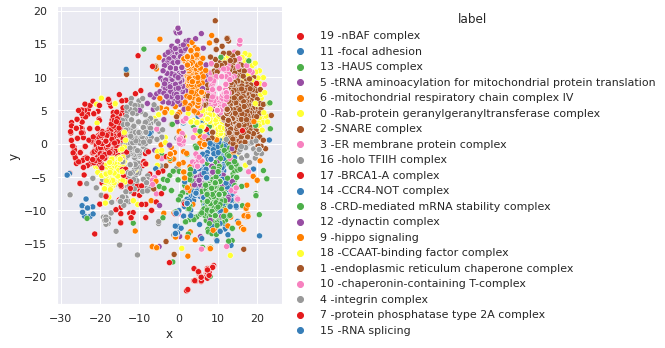

In [77]:
# Cluster
A, nodemap = net_Adjs["biotin_full"]
clusters = recursive_clustering(A, 3, 50, 500)

# TSNE
from sklearn.manifold import TSNE
# Embedding
X = compute_X_normalized(A)
T = TSNE(n_components=2, learning_rate='auto',
                   init='random').fit_transform(X)

# Uniprot->Entrez
ids_to_select = []
for i in clusters:
    ids_to_select += clusters[i]
ids_to_select = sorted(ids_to_select)
ids_to_select

T = T[ids_to_select]

#After sorting, we get a new map that links the new order with the older position
idmap        = {i:k for i, k in enumerate(ids_to_select)}
ridmap       = {k:i for i, k in idmap.items()}
labels       = np.zeros((len(idmap),))

clusters_entrez  = {}
r_map_s      = {k:entrmap[i] for i, k in nodemap.items()}
for i in clusters:
    clusters_entrez[i] = []
    for j in clusters[i]:
        labels[ridmap[j]] = i 
        clusters_entrez[i].append(r_map_s[j])
        
table = {}
table["x"] = T[:, 0]
table["y"] = T[:, 1]
table["label"] = labels

df = pd.DataFrame(table)
df

fenrich = {}
for label, prots in clusters_entrez.items():
    print(f"Label: {label}")
    fenrich[label] = fassoc.request(list(prots))
    
phat_thres = 0.0005
f       = {}
for i in fenrich:
    f[i] = fenrich[i].loc[fenrich[i]["adjusted-p-value"] <= phat_thres]
    
df["label"] = df["label"].apply(lambda x: f"{int(x)} -"  + ( 
    " No Enrichment " if f[int(x)].empty 
    else f[int(x)].loc[f[int(x)]["adjusted-p-value"].idxmin()]["Gene-Ontology-Attribute"]))

import seaborn as sns
sns.set(rc={'figure.figsize':(20, 15)})
sns.relplot(data=df, x="x", y = "y", hue="label", palette="Set1")

## Y2H-shared

/afs/csail.mit.edu/u/k/kdevko01/miniconda3/envs/dscript/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."
/afs/csail.mit.edu/u/k/kdevko01/miniconda3/envs/dscript/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."
/afs/csail.mit.edu/u/k/kdevko01/miniconda3/envs/dscript/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."
/afs/csail.mit.edu/u/k/kdevko01/miniconda3/envs/dscript/lib/python3.7/site-packages/sklearn/manifold/_spectral_e

Label: 0
Label: 1
Label: 2
Label: 3
Label: 4
Label: 5
Label: 6
Label: 7
Label: 8
Label: 9
Label: 10
Label: 11
Label: 12
Label: 13
Label: 14
Label: 15
Label: 16
Label: 17
Label: 18
Label: 19
Label: 20
Label: 21
Label: 22
Label: 23
Label: 24
Label: 25
Label: 26
Label: 27
Label: 28
Label: 29
Label: 30
Label: 31
Label: 32
Label: 33
Label: 34
Label: 35


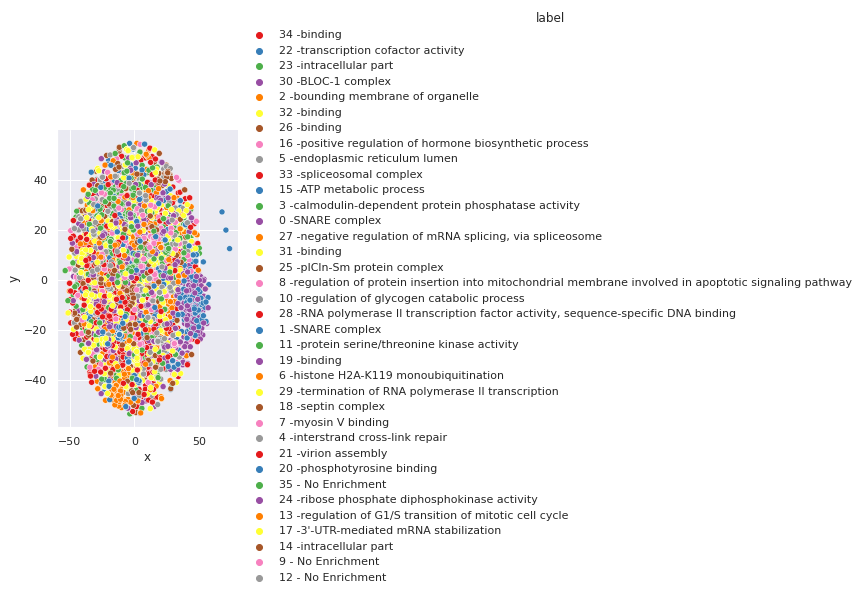

In [79]:
# Cluster
A, nodemap = net_Adjs["y2h_full_shared"]
clusters = recursive_clustering(A, 3, 50, 500)

# TSNE
from sklearn.manifold import TSNE
# Embedding
X = compute_X_normalized(A)
T = TSNE(n_components=2, learning_rate='auto',
                   init='random').fit_transform(X)

# Uniprot->Entrez
ids_to_select = []
for i in clusters:
    ids_to_select += clusters[i]
ids_to_select = sorted(ids_to_select)
ids_to_select

T = T[ids_to_select]

#After sorting, we get a new map that links the new order with the older position
idmap        = {i:k for i, k in enumerate(ids_to_select)}
ridmap       = {k:i for i, k in idmap.items()}
labels       = np.zeros((len(idmap),))

clusters_entrez  = {}
r_map_s      = {k:entrmap[i] for i, k in nodemap.items()}
for i in clusters:
    clusters_entrez[i] = []
    for j in clusters[i]:
        labels[ridmap[j]] = i 
        clusters_entrez[i].append(r_map_s[j])
        
table = {}
table["x"] = T[:, 0]
table["y"] = T[:, 1]
table["label"] = labels

df = pd.DataFrame(table)
df

fenrich = {}
for label, prots in clusters_entrez.items():
    print(f"Label: {label}")
    fenrich[label] = fassoc.request(list(prots))
    
phat_thres = 0.0005
f       = {}
for i in fenrich:
    f[i] = fenrich[i].loc[fenrich[i]["adjusted-p-value"] <= phat_thres]
    
df["label"] = df["label"].apply(lambda x: f"{int(x)} -"  + ( 
    " No Enrichment " if f[int(x)].empty 
    else f[int(x)].loc[f[int(x)]["adjusted-p-value"].idxmin()]["Gene-Ontology-Attribute"]))

import seaborn as sns
sns.set(rc={'figure.figsize':(20, 15)})
sns.relplot(data=df, x="x", y = "y", hue="label", palette="Set1")

## CoIP shared

/afs/csail.mit.edu/u/k/kdevko01/miniconda3/envs/dscript/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."
/afs/csail.mit.edu/u/k/kdevko01/miniconda3/envs/dscript/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."
/afs/csail.mit.edu/u/k/kdevko01/miniconda3/envs/dscript/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."
/afs/csail.mit.edu/u/k/kdevko01/miniconda3/envs/dscript/lib/python3.7/site-packages/sklearn/manifold/_spectral_e

Label: 0
Label: 1
Label: 2
Label: 3
Label: 4
Label: 5
Label: 6
Label: 7
Label: 8
Label: 9
Label: 10
Label: 11
Label: 12
Label: 13
Label: 14
Label: 15
Label: 16
Label: 17
Label: 18
Label: 19
Label: 20
Label: 21
Label: 22
Label: 23
Label: 24
Label: 25
Label: 26
Label: 27
Label: 28
Label: 29
Label: 30
Label: 31
Label: 32
Label: 33
Label: 34
Label: 35
Label: 36
Label: 37
Label: 38
Label: 39
Label: 40
Label: 41
Label: 42
Label: 43
Label: 44


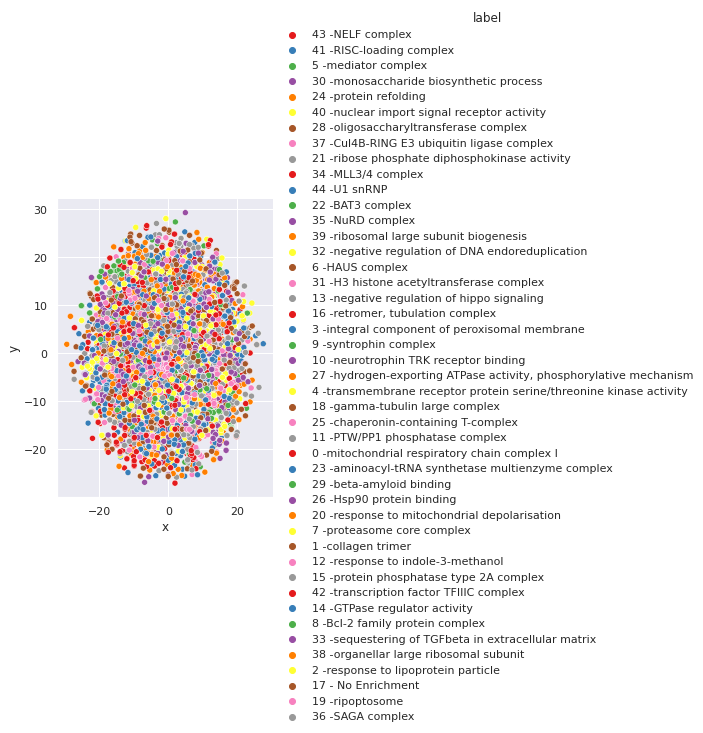

In [80]:
# Cluster
A, nodemap = net_Adjs["coip_full_shared"]
clusters = recursive_clustering(A, 3, 50, 500)

# TSNE
from sklearn.manifold import TSNE
# Embedding
X = compute_X_normalized(A)
T = TSNE(n_components=2, learning_rate='auto',
                   init='random').fit_transform(X)

# Uniprot->Entrez
ids_to_select = []
for i in clusters:
    ids_to_select += clusters[i]
ids_to_select = sorted(ids_to_select)
ids_to_select

T = T[ids_to_select]

#After sorting, we get a new map that links the new order with the older position
idmap        = {i:k for i, k in enumerate(ids_to_select)}
ridmap       = {k:i for i, k in idmap.items()}
labels       = np.zeros((len(idmap),))

clusters_entrez  = {}
r_map_s      = {k:entrmap[i] for i, k in nodemap.items()}
for i in clusters:
    clusters_entrez[i] = []
    for j in clusters[i]:
        labels[ridmap[j]] = i 
        clusters_entrez[i].append(r_map_s[j])
        
table = {}
table["x"] = T[:, 0]
table["y"] = T[:, 1]
table["label"] = labels

df = pd.DataFrame(table)
df

fenrich = {}
for label, prots in clusters_entrez.items():
    print(f"Label: {label}")
    fenrich[label] = fassoc.request(list(prots))
    
phat_thres = 0.0005
f       = {}
for i in fenrich:
    f[i] = fenrich[i].loc[fenrich[i]["adjusted-p-value"] <= phat_thres]
    
df["label"] = df["label"].apply(lambda x: f"{int(x)} -"  + ( 
    " No Enrichment " if f[int(x)].empty 
    else f[int(x)].loc[f[int(x)]["adjusted-p-value"].idxmin()]["Gene-Ontology-Attribute"]))

import seaborn as sns
sns.set(rc={'figure.figsize':(20, 15)})
sns.relplot(data=df, x="x", y = "y", hue="label", palette="Set1")

## Y2H-hiconf

/afs/csail.mit.edu/u/k/kdevko01/miniconda3/envs/dscript/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."
/afs/csail.mit.edu/u/k/kdevko01/miniconda3/envs/dscript/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."
/afs/csail.mit.edu/u/k/kdevko01/miniconda3/envs/dscript/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."
/afs/csail.mit.edu/u/k/kdevko01/miniconda3/envs/dscript/lib/python3.7/site-packages/sklearn/manifold/_spectral_e

Label: 0
Label: 1
Label: 2
Label: 3
Label: 4
Label: 5
Label: 6
Label: 7
Label: 8
Label: 9
Label: 10
Label: 11
Label: 12
Label: 13
Label: 14
Label: 15
Label: 16
Label: 17
Label: 18
Label: 19
Label: 20
Label: 21
Label: 22
Label: 23
Label: 24
Label: 25
Label: 26
Label: 27
Label: 28
Label: 29
Label: 30
Label: 31
Label: 32
Label: 33
Label: 34
Label: 35
Label: 36


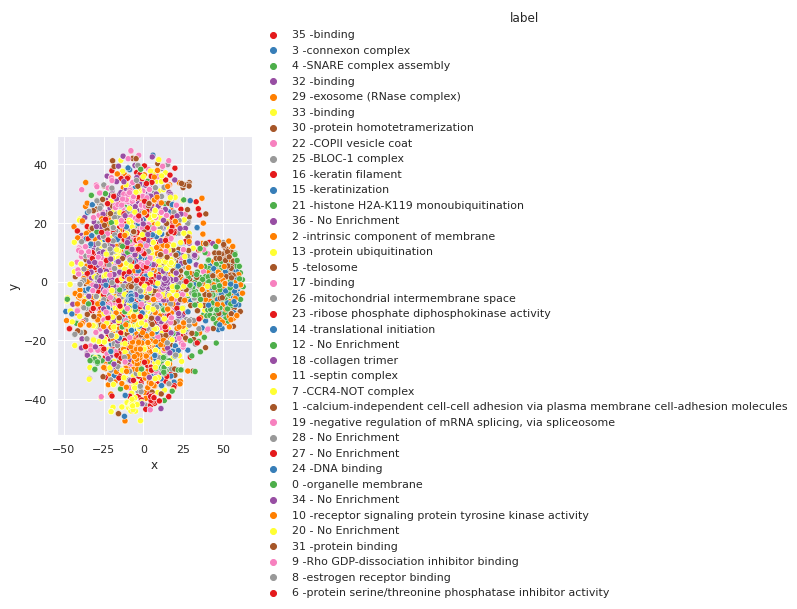

In [81]:
# Cluster
A, nodemap = net_Adjs["y2h_hconf"]
clusters = recursive_clustering(A, 3, 50, 500)

# TSNE
from sklearn.manifold import TSNE
# Embedding
X = compute_X_normalized(A)
T = TSNE(n_components=2, learning_rate='auto',
                   init='random').fit_transform(X)

# Uniprot->Entrez
ids_to_select = []
for i in clusters:
    ids_to_select += clusters[i]
ids_to_select = sorted(ids_to_select)
ids_to_select

T = T[ids_to_select]

#After sorting, we get a new map that links the new order with the older position
idmap        = {i:k for i, k in enumerate(ids_to_select)}
ridmap       = {k:i for i, k in idmap.items()}
labels       = np.zeros((len(idmap),))

clusters_entrez  = {}
r_map_s      = {k:entrmap[i] for i, k in nodemap.items()}
for i in clusters:
    clusters_entrez[i] = []
    for j in clusters[i]:
        labels[ridmap[j]] = i 
        clusters_entrez[i].append(r_map_s[j])
        
table = {}
table["x"] = T[:, 0]
table["y"] = T[:, 1]
table["label"] = labels

df = pd.DataFrame(table)
df

fenrich = {}
for label, prots in clusters_entrez.items():
    print(f"Label: {label}")
    fenrich[label] = fassoc.request(list(prots))
    
phat_thres = 0.0005
f       = {}
for i in fenrich:
    f[i] = fenrich[i].loc[fenrich[i]["adjusted-p-value"] <= phat_thres]
    
df["label"] = df["label"].apply(lambda x: f"{int(x)} -"  + ( 
    " No Enrichment " if f[int(x)].empty 
    else f[int(x)].loc[f[int(x)]["adjusted-p-value"].idxmin()]["Gene-Ontology-Attribute"]))

import seaborn as sns
sns.set(rc={'figure.figsize':(20, 15)})
sns.relplot(data=df, x="x", y = "y", hue="label", palette="Set1")

## COIP-hconf

/afs/csail.mit.edu/u/k/kdevko01/miniconda3/envs/dscript/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."
/afs/csail.mit.edu/u/k/kdevko01/miniconda3/envs/dscript/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."
/afs/csail.mit.edu/u/k/kdevko01/miniconda3/envs/dscript/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."
/afs/csail.mit.edu/u/k/kdevko01/miniconda3/envs/dscript/lib/python3.7/site-packages/sklearn/manifold/_spectral_e

Label: 0
Label: 1
Label: 2
Label: 3
Label: 4
Label: 5
Label: 6
Label: 7
Label: 8
Label: 9
Label: 10
Label: 11
Label: 12
Label: 13
Label: 14
Label: 15
Label: 16
Label: 17
Label: 18
Label: 19
Label: 20
Label: 21
Label: 22
Label: 23


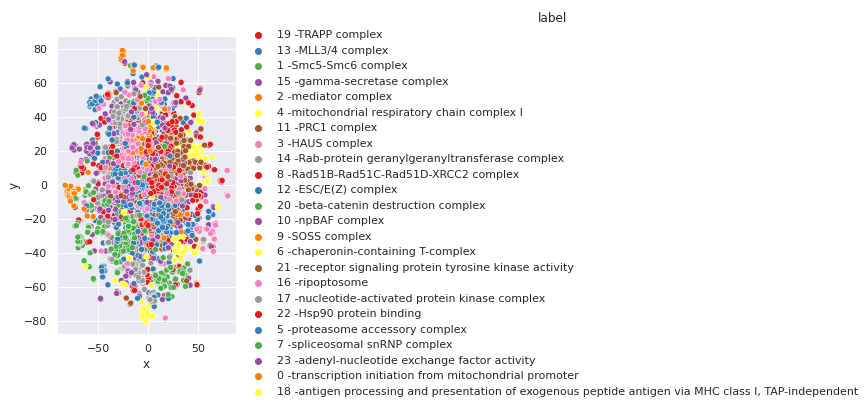

In [82]:
# Cluster
A, nodemap = net_Adjs["coip_hconf"]
clusters = recursive_clustering(A, 3, 50, 500)

# TSNE
from sklearn.manifold import TSNE
# Embedding
X = compute_X_normalized(A)
T = TSNE(n_components=2, learning_rate='auto',
                   init='random').fit_transform(X)

# Uniprot->Entrez
ids_to_select = []
for i in clusters:
    ids_to_select += clusters[i]
ids_to_select = sorted(ids_to_select)
ids_to_select

T = T[ids_to_select]

#After sorting, we get a new map that links the new order with the older position
idmap        = {i:k for i, k in enumerate(ids_to_select)}
ridmap       = {k:i for i, k in idmap.items()}
labels       = np.zeros((len(idmap),))

clusters_entrez  = {}
r_map_s      = {k:entrmap[i] for i, k in nodemap.items()}
for i in clusters:
    clusters_entrez[i] = []
    for j in clusters[i]:
        labels[ridmap[j]] = i 
        clusters_entrez[i].append(r_map_s[j])
        
table = {}
table["x"] = T[:, 0]
table["y"] = T[:, 1]
table["label"] = labels

df = pd.DataFrame(table)
df

fenrich = {}
for label, prots in clusters_entrez.items():
    print(f"Label: {label}")
    fenrich[label] = fassoc.request(list(prots))
    
phat_thres = 0.0005
f       = {}
for i in fenrich:
    f[i] = fenrich[i].loc[fenrich[i]["adjusted-p-value"] <= phat_thres]
    
df["label"] = df["label"].apply(lambda x: f"{int(x)} -"  + ( 
    " No Enrichment " if f[int(x)].empty 
    else f[int(x)].loc[f[int(x)]["adjusted-p-value"].idxmin()]["Gene-Ontology-Attribute"]))

import seaborn as sns
sns.set(rc={'figure.figsize':(20, 15)})
sns.relplot(data=df, x="x", y = "y", hue="label", palette="Set1")

### TODO
1. First round of experiments: Y2H-, Y2H-SHARED based on high-confidence (threshold = 0.5), 
                             CO-IP, CO-IP-SHARED based on high-confidence (threshold = )
                             # First DO the Entrez matching, then do the thresholding.

## Find 3-CLIQUES and 4-CLIQUES

## Get All Networks

In [19]:
import pandas as pd
import networkx as nx

c = pd.read_csv("../data/networks/coip_hc_full.tsv", sep = "\t", header = None)
y = pd.read_csv("../data/networks/y2h_hc_full.tsv", sep = "\t", header = None)
cs = pd.read_csv("../data/networks/coip_hc_shared.tsv", sep = "\t", header = None)
ys = pd.read_csv("../data/networks/y2h_hc_shared.tsv", sep = "\t", header = None)

gc  = nx.from_pandas_edgelist(c, 0, 1, 2)
gy  = nx.from_pandas_edgelist(y, 0, 1, 2)
gcs = nx.from_pandas_edgelist(cs, 0, 1, 2)
gys = nx.from_pandas_edgelist(ys, 0, 1, 2)

## Get Clustering Coefficients (C3)

In [6]:
cname = ["coip", "y2h", "coip_shared", "y2h_shared"]
cmat  = [gc, gy, gcs, gys]
cc3    = [(n, nx.average_clustering(c)) for n, c in zip(cname, cmat)]
cc3

[('coip', 0.1491005172236027),
 ('y2h', 0.0545058052240701),
 ('coip_shared', 0.16051943577950162),
 ('y2h_shared', 0.046768868100458855)]

## Get Clustering Coefficients (C4)

In [13]:
import numpy as np

cc4 = [np.mean(list(nx.square_clustering(c).values())) for n, c in zip(cname, cmat)]
cc4

[0.04410007120960226,
 0.030597263163203638,
 0.04785061857566836,
 0.025622544396029873]

In [14]:
dfcc       = pd.DataFrame(cc3, columns = ["Network", "C3"])
dfcc["C4"] = cc4
dfcc

,Network,C3,C4
0,coip,0.149101,0.044100
1,y2h,0.054506,0.030597
2,coip_shared,0.160519,0.047851
3,y2h_shared,0.046769,0.025623
